Mean squared error: 2106803505.14
R² score: -0.08


/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4667/699900770.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4667/699900770.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4667/699900770.py:17: SettingWithCopyWarning: 
A value is trying to be set on a

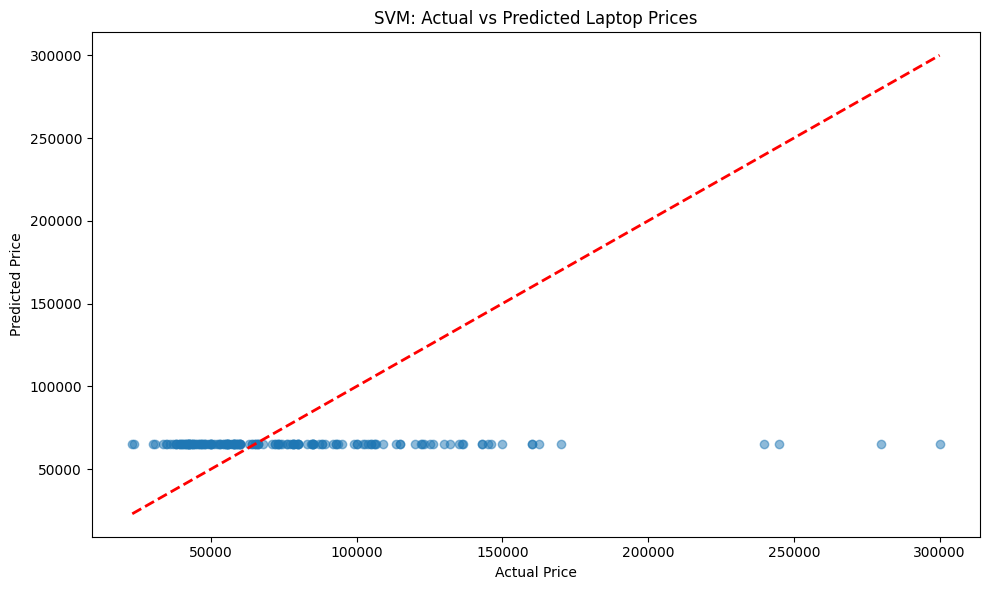

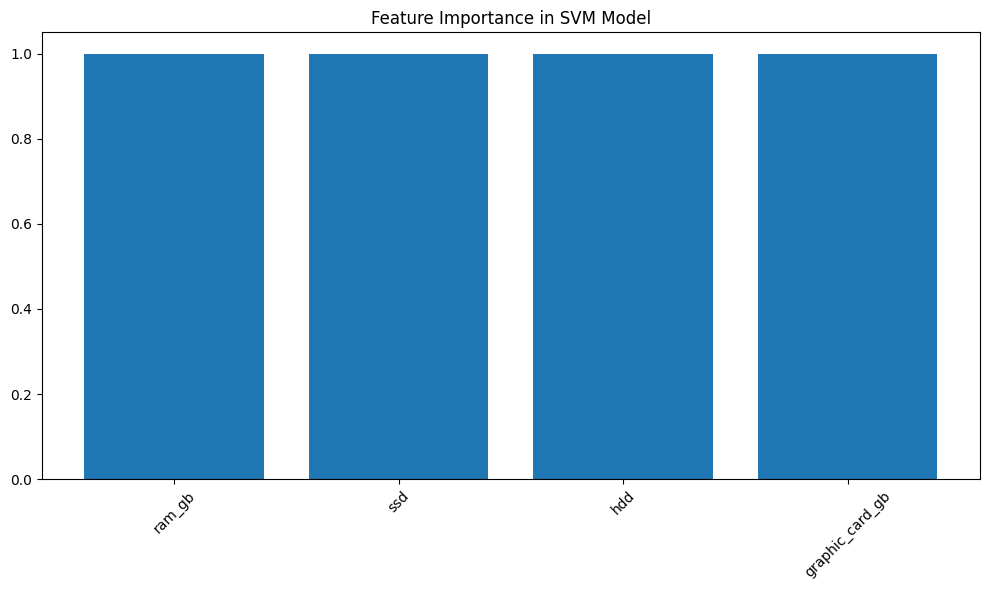

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv('laptopPrice.csv')
X = df[['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']]
y = df['Price'] # Changed from 'price_euros' to 'price' to match column name

# Clean data by removing 'GB' and converting to float
X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float) 
X['hdd'] = X['hdd'].str.replace(' GB', '').astype(float)
X['graphic_card_gb'] = X['graphic_card_gb'].str.replace(' GB', '').astype(float)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R² score: {r2:.2f}")

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('SVM: Actual vs Predicted Laptop Prices')
plt.tight_layout()
plt.show()

# Feature importance visualization (using absolute coefficients)
feature_importance = np.abs(svm_model.dual_coef_[0])
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance[:4])
plt.title('Feature Importance in SVM Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
